## Summary

__Yi Li__

This notebook uses PCA to do dimension reduction on 400 face images (each one has 10304 pixels) to find the top k eigenfaces. After compressing images (dimension reduction), I find the most similar face image of a given face image by calculating the euclidian distance between each pair of the given image and the others in the database.


## PCA explanation
 $A$ is a $10304*400$ matrix, which represents the data of 400 face images (each one has 10304 pixels).
 
 $C = AA^T$ is a $10304*10304$ matrix,
 
 $C' = A^TA$ is a $400*400$ matrix.
 
 $A^TAV = \lambda V$, $V$ is the eigenvectors $(400*400)$ for the matrix $A^TA$, that is, $C'$.
 
 Using PCA and choose top $k$ eigenvectors, then $V$ becomes a $400*k$ matirx.
 
 $(AA^T)(AV) = \lambda(AV)$, $AV$ is the eigenvectors for the matrix $AA^T$, that is, $C$. 
 
 $AV$ is called eigenfaces. $A$ times the top $k$ eigenvectors of $V$, then $AV$ becomes a $10304*k$ matirx.
 


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

(1, 10304)


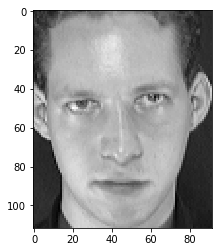

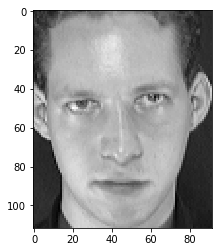

In [2]:
## convert the first image to a vector
img1 = Image.open('FACESdata/s1/1.pgm').convert('L')
plt.imshow(img1, cmap = plt.get_cmap("gray"))

imagearray1 = np.array(img1)
original_shape = imagearray1.shape
flat1 = imagearray1.ravel()
facevector1 = np.matrix(flat1)
print(facevector1.shape)

## reverse: convert an image-vector back into a .jpg image.
f = plt.figure()
plt.imshow(facevector1.reshape(original_shape), cmap = plt.get_cmap("gray"))
plt.show()
f.savefig("FaceBackTest.jpg")

400


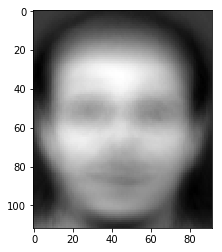

In [3]:
## place all the vectorized images into one matrix
paths = [] # store all paths
facematrix = np.zeros([400, 10304])
count = 0
for i in range(1,41):
    for j in range(1,11):
        fullpath='FACESdata/s'+str(i)+'/'+str(j)+'.pgm'
        paths.append(fullpath)
        img=Image.open(fullpath).convert('L')
        imagearray = np.array(img)
        # flatten the imagearray into 1-dim
        flat = imagearray.ravel()
        # convert it to a matrix
        facevector = np.matrix(flat)
        facematrix[count,:] = facevector
        count += 1 
        
print(count)
#print(facematrix.shape)
#print(facematrix)

## transpose so that each column is an image
facematrix_t=np.transpose(facematrix)
#print(facematrix_t.shape)

# the mean
mean = np.mean(facematrix_t, axis=1)
#print(mean.shape)
#print(mean)
f = plt.figure()
plt.imshow(mean.reshape(original_shape), cmap = plt.get_cmap("gray"))
plt.show()
f.savefig("mean_face.jpg")

In [9]:
print(facematrix_t.shape)
print(mean.shape)
print(Norm_Face_Matrix.shape)
print(eig_vecs.shape)

(10304, 400)
(10304,)
(10304, 400)
(400, 400)


In [6]:
## substract the mean of all of the columns to get a normalized matrix
Norm_Face_Matrix = facematrix_t - mean.reshape([10304,1])
#print(Norm_Face_Matrix.shape)
print(Norm_Face_Matrix)

[[-46.825  -25.825   45.175  ...,  39.175   33.175   39.175 ]
 [-41.7775 -25.7775  43.2225 ...,  33.2225  34.2225  38.2225]
 [-33.1375 -24.1375  43.8625 ...,  37.8625  33.8625  37.8625]
 ..., 
 [-47.88   -44.88   -25.88   ..., -40.88    12.12   -40.88  ]
 [-49.87   -41.87   -27.87   ..., -36.87    18.13   -40.87  ]
 [-46.25   -41.25   -20.25   ..., -35.25     9.75   -41.25  ]]


In [8]:
## get the reduced covariance matrix based on Turk and Pentland:
Norm_Face_Matrix_t = np.transpose(Norm_Face_Matrix)
CovMatrix = np.matmul(Norm_Face_Matrix_t, Norm_Face_Matrix)
#print(CovMatrix.shape)

## get eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(CovMatrix)

## sort eigenvalues and eigenvectors
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]     
eig_vecs = eig_vecs[:, idx]
print(eig_vals[0:5])
print(eig_vecs[:,0:5])

[  1.12570301e+09   8.25390350e+08   4.36716260e+08   3.57230059e+08
   3.27166296e+08]
[[ 0.08007301  0.01307005  0.04749607 -0.0030224   0.05780645]
 [ 0.08872508  0.02678731 -0.02338802  0.06126697  0.13954915]
 [ 0.03382817  0.02932312 -0.07527338 -0.03058444  0.04561505]
 ..., 
 [ 0.02545118  0.03366042 -0.07294872 -0.01159141 -0.03254684]
 [ 0.04178848  0.04471888 -0.03712496  0.00653416  0.01490292]
 [ 0.01634612  0.01727765 -0.09916495 -0.05552364  0.046973  ]]


[[ -67.11695825  427.3538574  -413.50238608 -229.11857613  -52.89477916]
 [ -66.80915716  425.21890255 -415.14713698 -230.07075035  -54.10792277]
 [ -67.59776872  425.89789747 -411.21183542 -231.17376054  -55.37111876]
 ..., 
 [-234.37241294 -302.35260046 -296.84676792  258.62567838   39.88338907]
 [-212.64929758 -277.56936829 -300.68714938  246.4047937    21.72754091]
 [-244.45746168 -252.0429397  -311.5266543   242.86551745   23.2467422 ]]


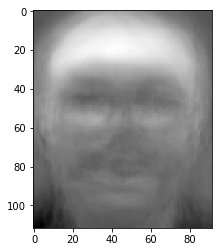

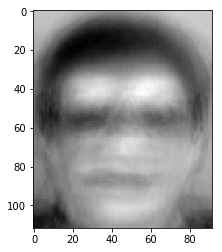

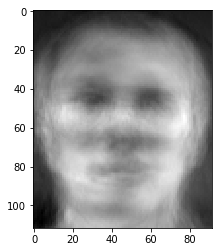

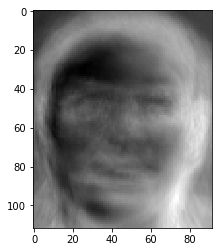

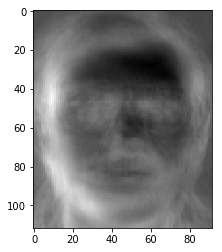

In [6]:
## choose top k eigenvectors
k = 5
eigenface_matrix = np.matmul(Norm_Face_Matrix, eig_vecs[:,0:k])
#eigenface_matrix = np.real(eigenface_matrix) # transfer fake complex to real
print(eigenface_matrix)

f = plt.figure()
for i in range(k):
    plt.imshow(eigenface_matrix[:,i].reshape(original_shape), cmap = plt.get_cmap("gray"))
    plt.show()
    f.savefig("eigenface/eigenface"+str(i)+".jpg")

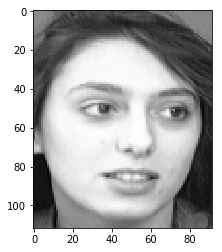

Find Closest File Number:  79 	Distance:  0.0


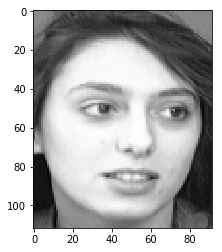

In [7]:
## Test 1
test = Image.open('TEST_Image.pgm').convert('L')
plt.imshow(test, cmap = plt.get_cmap("gray"))
plt.show()

test_face = np.array(test).ravel() - mean.ravel()
#print(test_face)

## Transpose the eigenface matrix and then multiply it by the test face vector.
test_k_values = np.matmul(np.transpose(eigenface_matrix), np.transpose(test_face))

## Do this same exact process with all of the faces in the database (normalized).
v = np.zeros([400, k]) # values for each face in the database
dist = [0 for i in range(400)] # distance between the test face and each face in the database

for i in range(400):
    temp = np.matmul(np.transpose(eigenface_matrix), Norm_Face_Matrix[:,i])
    v[i,:] = np.transpose(temp)
    dist[i] = np.sum(np.square(v[i,:] - np.transpose(test_k_values)))

## Find the image with the smallest Euclidean distance
num_file = dist.index(min(dist))
#num_file = dist.index(sorted(dist)[1])
print("Find Closest File Number: ", num_file, "\tDistance: ", min(dist))
result = Image.open(paths[num_file]).convert('L')
f = plt.figure()
plt.imshow(result, cmap = plt.get_cmap("gray"))
plt.show()
f.savefig("PREDICTED_Image.jpg")

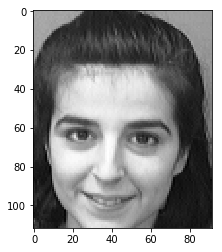

Find Closest File Number:  91 	Distance:  5.46332293506e+14


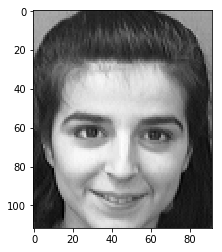

In [8]:
## Test 2
test = Image.open('TEST_Image_2.pgm').convert('L')
plt.imshow(test, cmap = plt.get_cmap("gray"))
plt.show()

test_face = np.array(test).ravel() - mean.ravel()
#print(test_face)

## Transpose the eigenface matrix and then multiply it by the test face vector.
test_k_values = np.matmul(np.transpose(eigenface_matrix), np.transpose(test_face))

## Do this same exact process with all of the faces in the database (normalized).
v = np.zeros([400, k]) # values for each face in the database
dist = [0 for i in range(400)] # distance between the test face and each face in the database

for i in range(400):
    temp = np.matmul(np.transpose(eigenface_matrix), Norm_Face_Matrix[:,i])
    v[i,:] = np.transpose(temp)
    dist[i] = np.sum(np.square(v[i,:] - np.transpose(test_k_values)))

## Find the image with the smallest Euclidean distance
#num_file = dist.index(min(dist))
num_file = dist.index(sorted(dist)[1])
print("Find Closest File Number: ", num_file, "\tDistance: ", sorted(dist)[1])
result = Image.open(paths[num_file]).convert('L')
f = plt.figure()
plt.imshow(result, cmap = plt.get_cmap("gray"))
plt.show()
f.savefig("PREDICTED_Image_2.jpg")